MA5 (0j default EM creator run card) total number of events :  199894
{'ptmiss': 0.12321530411117892, 'veto_electron': 0.12317528289993697, 'veto_muon': 0.12314026434010025, 'veto_tau': 0.11960839244799744, 'veto_btag': 0.10620628933334668, 'veto_photon': 0.10288953145166939, 'dphijm': 0.09776181376129349, 'leadak4_pt': 0.09744164407135782, 'leadak4_eta': 0.09647112969874033}
MA5 effs (0j default EM creator run card) :  [0.12321530411117892, 0.12317528289993697, 0.12314026434010025, 0.11960839244799744, 0.10620628933334668, 0.10288953145166939, 0.09776181376129349, 0.09744164407135782, 0.09647112969874033]
------------------------------------------

MA5 (1j default EM creator run card) total number of events :  187461
{'ptmiss': 0.1245219005553155, 'veto_electron': 0.12447922501213586, 'veto_muon': 0.12445255279764858, 'veto_tau': 0.12087847605635306, 'veto_btag': 0.10664084796304298, 'veto_photon': 0.10357887773990324, 'dphijm': 0.09805239489813881, 'leadak4_pt': 0.09775366609588128, 

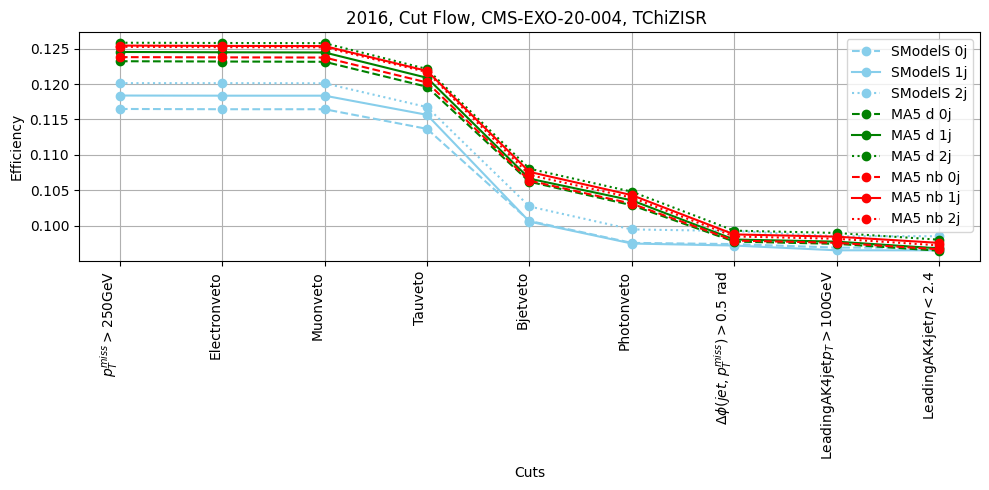

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_cut_flow_data(filename, m_med, m_dm, data_period):
    # Read the content of the file
    with open(filename, 'r') as file:
        content = file.read()

    # Split the content into blocks based on the presence of 'Cut stage'
    blocks = re.split(r'(?<=\n\n)', content.strip())

    # Initialize a result dictionary
    result = {}

    for block in blocks:
        # Check for coupling, mode, masses, and data-taking period in each block
        lines = block.strip().split('\n')
        coupling = None
        mode = None
        med_value = None
        dm_value = None
        period_value = None

        for line in lines:
            # Check for coupling, mode, and other relevant values
            if line.startswith("#: Coupling"):
                coupling = line.split(',')[1].strip()
            elif line.startswith("#: Mode"):
                mode = line.split(',')[1].strip()
            elif line.startswith("#: $m_{med}$"):
                med_value = float(line.split(',')[1].strip())
            elif line.startswith("#: $m_{DM}$"):
                dm_value = float(line.split(',')[1].strip())
            elif line.startswith("#: Data-taking period"):
                period_value = line.split(',')[1].strip()

        # Check if the current block matches the criteria
        if (med_value == m_med and dm_value == m_dm and period_value == data_period):
            # Parse the cut flow data
            for line in lines:
                if line and not line.startswith("#:") and "Cut stage" not in line:
                        print(line)
                        cut_stage, fraction = line.split(',')
                        result[cut_stage.strip()] = float(fraction.strip())

            break  # Exit after finding the first matching block

    return result


def extract_cut_info(filename, cut_indices):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    # Extract cuts and their corresponding entries
    current_cut_index = 0
    for i, line in enumerate(lines):
        if "<Counter>" in line:
            # Find the name of the cut
            cut_name = lines[i+1].split('"')[1]
            # Check if the current cut index is in the requested cut indices
            if current_cut_index in cut_indices:
                # nentries is the first number on the third line after <Counter>
                nentries = int(lines[i+2].split()[0])
                cut_dict[cut_name] = nentries
            
            current_cut_index += 1

    return initial_entries, cut_dict


MA5_0j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"
MA5_1j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"
MA5_2j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"


MA5_0j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"
MA5_1j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"
MA5_2j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf"


cut_indices_2016 = [0,1,2,3,4,5,6,7,8]

MA5_initial_nentries_0j_d, MA5_dict_0j_d = extract_cut_info(MA5_0j_default, cut_indices_2016)
print("MA5 (0j default EM creator run card) total number of events : ", MA5_initial_nentries_0j_d)
#print(MA5_dict_0j_d)
MA5_dict_eff_0j_d = {key: value / MA5_initial_nentries_0j_d for key, value in MA5_dict_0j_d.items()}
print(MA5_dict_eff_0j_d)
keys_MA5_0j_d = list(MA5_dict_eff_0j_d.keys())
values_MA5_0j_d = list(MA5_dict_eff_0j_d.values())
print("MA5 effs (0j default EM creator run card) : ", values_MA5_0j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_d, MA5_dict_1j_d = extract_cut_info(MA5_1j_default, cut_indices_2016)
print("MA5 (1j default EM creator run card) total number of events : ", MA5_initial_nentries_1j_d)
#print(MA5_dict_1j_d)
MA5_dict_eff_1j_d = {key: value / MA5_initial_nentries_1j_d for key, value in MA5_dict_1j_d.items()}
print(MA5_dict_eff_1j_d)
keys_MA5_1j_d = list(MA5_dict_eff_1j_d.keys())
values_MA5_1j_d = list(MA5_dict_eff_1j_d.values())
print("MA5 effs (1j default EM creator run card) : ", values_MA5_1j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_d, MA5_dict_2j_d = extract_cut_info(MA5_2j_default, cut_indices_2016)
print("MA5 (2j default EM creator run card) total number of events : ", MA5_initial_nentries_2j_d)
#print(MA5_dict_2j_d)
MA5_dict_eff_2j_d = {key: value / MA5_initial_nentries_2j_d for key, value in MA5_dict_2j_d.items()}
print(MA5_dict_eff_2j_d)
keys_MA5_2j_d = list(MA5_dict_eff_2j_d.keys())
values_MA5_2j_d = list(MA5_dict_eff_2j_d.values())
print("MA5 effs (2j default EM creator run card) : ", values_MA5_2j_d)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

MA5_initial_nentries_0j_nb, MA5_dict_0j_nb = extract_cut_info(MA5_0j_nb_card, cut_indices_2016)
print("MA5 (0j non-biased run card) total number of events : ", MA5_initial_nentries_0j_nb)
#print(MA5_dict_0j_nb)
MA5_dict_eff_0j_nb = {key: value / MA5_initial_nentries_0j_nb for key, value in MA5_dict_0j_nb.items()}
print(MA5_dict_eff_0j_nb)
keys_MA5_0j_nb = list(MA5_dict_eff_0j_nb.keys())
values_MA5_0j_nb = list(MA5_dict_eff_0j_nb.values())
print("MA5 effs (0j non-biased run card) : ", values_MA5_0j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_nb, MA5_dict_1j_nb = extract_cut_info(MA5_1j_nb_card, cut_indices_2016)
print("MA5 (1j non-biased run card) total number of events : ", MA5_initial_nentries_1j_nb)
#print(MA5_dict_1j_nb)
MA5_dict_eff_1j_nb = {key: value / MA5_initial_nentries_1j_nb for key, value in MA5_dict_1j_nb.items()}
print(MA5_dict_eff_1j_nb)
keys_MA5_1j_nb = list(MA5_dict_eff_1j_nb.keys())
values_MA5_1j_nb = list(MA5_dict_eff_1j_nb.values())
print("MA5 effs (1j non-biased run card) : ", values_MA5_1j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_nb, MA5_dict_2j_nb = extract_cut_info(MA5_2j_nb_card, cut_indices_2016)
print("MA5 (2j non-biased run card) total number of events : ", MA5_initial_nentries_2j_nb)
#print(MA5_dict_2j_nb)
MA5_dict_eff_2j_nb = {key: value / MA5_initial_nentries_2j_nb for key, value in MA5_dict_2j_nb.items()}
print(MA5_dict_eff_2j_nb)
keys_MA5_2j_nb = list(MA5_dict_eff_2j_nb.keys())
values_MA5_2j_nb = list(MA5_dict_eff_2j_nb.values())
print("MA5 effs (2j non-biased run card) : ", values_MA5_2j_nb)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_0j = df_0j.iloc[-13:, 0].tolist()
pcl_2017_0j = df_0j.iloc[-13:, 1].tolist()
pcl_2018_0j = df_0j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_1j = df_1j.iloc[-13:, 0].tolist()
pcl_2017_1j = df_1j.iloc[-13:, 1].tolist()
pcl_2018_1j = df_1j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_2j = df_2j.iloc[-13:, 0].tolist()
pcl_2017_2j = df_2j.iloc[-13:, 1].tolist()
pcl_2018_2j = df_2j.iloc[-13:, 2].tolist()

selected_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10]

cuts_names = df_0j.index[-13:].tolist()
new_cuts_names = [cuts_names[i] for i in selected_indices]

# Indices of keys you want to include in the plot  
new_pcl_16_0j = [pcl_2016_0j[i] for i in selected_indices]
new_pcl_17_0j = [pcl_2017_0j[i] for i in selected_indices]
new_pcl_18_0j = [pcl_2018_0j[i] for i in selected_indices]

# Indices of keys you want to include in the plot 
new_pcl_16_1j = [pcl_2016_1j[i] for i in selected_indices]
new_pcl_17_1j = [pcl_2017_1j[i] for i in selected_indices]
new_pcl_18_1j = [pcl_2018_1j[i] for i in selected_indices]

# Indices of keys you want to include in the plot  
new_pcl_16_2j = [pcl_2016_2j[i] for i in selected_indices]
new_pcl_17_2j = [pcl_2017_2j[i] for i in selected_indices]
new_pcl_18_2j = [pcl_2018_2j[i] for i in selected_indices]



#print(new_cuts_names)
print("SModelS reacst code 0j effs : ", new_pcl_16_0j)
print("------------------------------------------")
print("SModelS reacst code 1j effs : ", new_pcl_16_1j)
print("------------------------------------------")
print("SModelS reacst code 2j effs : ", new_pcl_16_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Compute percentage difference
percentage_diff_ma5_0j = np.abs(np.array(values_MA5_0j_d) - np.array(values_MA5_0j_nb)) / ((np.array(values_MA5_0j_d) + np.array(values_MA5_0j_nb)) / 2) * 100

percentage_diff_ma5_1j = np.abs(np.array(values_MA5_1j_d) - np.array(values_MA5_1j_nb)) / ((np.array(values_MA5_1j_d) + np.array(values_MA5_1j_nb)) / 2) * 100

percentage_diff_ma5_2j = np.abs(np.array(values_MA5_2j_d) - np.array(values_MA5_2j_nb)) / ((np.array(values_MA5_2j_d) + np.array(values_MA5_2j_nb)) / 2) * 100

percentage_diff_0j = np.abs(np.array(values_MA5_0j_nb) - np.array(new_pcl_16_0j)) / ((np.array(values_MA5_0j_nb) + np.array(new_pcl_16_0j)) / 2) * 100

percentage_diff_1j = np.abs(np.array(values_MA5_1j_nb) - np.array(new_pcl_16_1j)) / ((np.array(values_MA5_1j_nb) + np.array(new_pcl_16_1j)) / 2) * 100

percentage_diff_2j = np.abs(np.array(values_MA5_2j_nb) - np.array(new_pcl_16_2j)) / ((np.array(values_MA5_2j_nb) + np.array(new_pcl_16_2j)) / 2) * 100



print("MA5 Percentage difference (0j, default vs non-biased run card) : ", percentage_diff_ma5_0j)
print("------------------------------------------")
print("MA5 Percentage difference (1j, default vs non-biased run card) : ", percentage_diff_ma5_1j)
print("------------------------------------------")
print("MA5 Percentage difference (2j, default vs non-biased run card) : ", percentage_diff_ma5_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")
print("Percentage difference (0j, MA5 default vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("Percentage difference (1j, MA5 default vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("Percentage difference (2j, MA5 default vs SModelS recast) : ", percentage_diff_2j)


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(new_cuts_names, new_pcl_16_0j, color='skyblue', marker='o', linestyle='--', 
         label = 'SModelS 0j')
plt.plot(new_cuts_names, new_pcl_16_1j, color='skyblue', marker='o', linestyle='-', 
         label = 'SModelS 1j')
plt.plot(new_cuts_names, new_pcl_16_2j, color='skyblue', marker='o', linestyle=':', 
         label = 'SModelS 2j')
plt.plot(new_cuts_names, values_MA5_0j_d, color='g', marker='o', linestyle='--',
         label = 'MA5 d 0j')
plt.plot(new_cuts_names, values_MA5_1j_d, color='g', marker='o', linestyle='-',
         label = 'MA5 d 1j')
plt.plot(new_cuts_names, values_MA5_2j_d, color='g', marker='o', linestyle=':',
         label = 'MA5 d 2j')
plt.plot(new_cuts_names, values_MA5_0j_nb, color='r', marker='o', linestyle='--',
         label = 'MA5 nb 0j')
plt.plot(new_cuts_names, values_MA5_1j_nb, color='r', marker='o', linestyle='-',
         label = 'MA5 nb 1j')
plt.plot(new_cuts_names, values_MA5_2j_nb, color='r', marker='o', linestyle=':',
         label = 'MA5 nb 2j')

plt.xlabel('Cuts')
plt.ylabel('Efficiency')
plt.title('2016, Cut Flow, CMS-EXO-20-004, TChiZISR ')
plt.xticks(rotation=90, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

MA5 (0j default EM creator run card) total number of events :  199894
{'ptmiss': 0.12321530411117892, 'veto_electron': 0.12317528289993697, 'veto_muon': 0.12314026434010025, 'veto_tau': 0.11960839244799744, 'veto_btag': 0.10620628933334668, 'veto_photon': 0.10288953145166939, 'dphijm': 0.09776181376129349, 'leadak4_pt': 0.09744164407135782, 'leadak4_eta': 0.09647112969874033}
MA5 effs (0j default EM creator run card) :  [0.12321530411117892, 0.12317528289993697, 0.12314026434010025, 0.11960839244799744, 0.10620628933334668, 0.10288953145166939, 0.09776181376129349, 0.09744164407135782, 0.09647112969874033]
------------------------------------------

MA5 (1j default EM creator run card) total number of events :  187461
{'ptmiss': 0.1245219005553155, 'veto_electron': 0.12447922501213586, 'veto_muon': 0.12445255279764858, 'veto_tau': 0.12087847605635306, 'veto_btag': 0.10664084796304298, 'veto_photon': 0.10357887773990324, 'dphijm': 0.09805239489813881, 'leadak4_pt': 0.09775366609588128, 

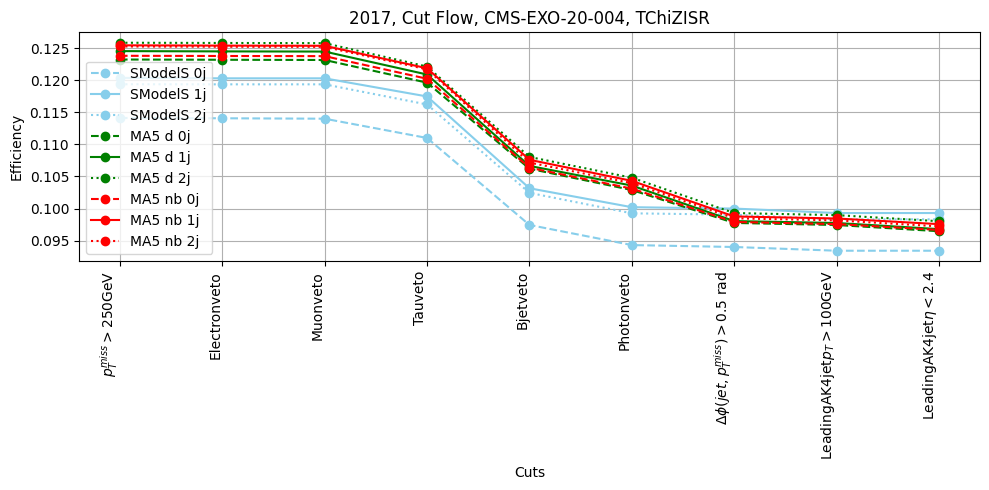

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_cut_flow_data(filename, m_med, m_dm, data_period):
    # Read the content of the file
    with open(filename, 'r') as file:
        content = file.read()

    # Split the content into blocks based on the presence of 'Cut stage'
    blocks = re.split(r'(?<=\n\n)', content.strip())

    # Initialize a result dictionary
    result = {}

    for block in blocks:
        # Check for coupling, mode, masses, and data-taking period in each block
        lines = block.strip().split('\n')
        coupling = None
        mode = None
        med_value = None
        dm_value = None
        period_value = None

        for line in lines:
            # Check for coupling, mode, and other relevant values
            if line.startswith("#: Coupling"):
                coupling = line.split(',')[1].strip()
            elif line.startswith("#: Mode"):
                mode = line.split(',')[1].strip()
            elif line.startswith("#: $m_{med}$"):
                med_value = float(line.split(',')[1].strip())
            elif line.startswith("#: $m_{DM}$"):
                dm_value = float(line.split(',')[1].strip())
            elif line.startswith("#: Data-taking period"):
                period_value = line.split(',')[1].strip()

        # Check if the current block matches the criteria
        if (med_value == m_med and dm_value == m_dm and period_value == data_period):
            # Parse the cut flow data
            for line in lines:
                if line and not line.startswith("#:") and "Cut stage" not in line:
                        print(line)
                        cut_stage, fraction = line.split(',')
                        result[cut_stage.strip()] = float(fraction.strip())

            break  # Exit after finding the first matching block

    return result


def extract_cut_info(filename, cut_indices):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    # Extract cuts and their corresponding entries
    current_cut_index = 0
    for i, line in enumerate(lines):
        if "<Counter>" in line:
            # Find the name of the cut
            cut_name = lines[i+1].split('"')[1]
            # Check if the current cut index is in the requested cut indices
            if current_cut_index in cut_indices:
                # nentries is the first number on the third line after <Counter>
                nentries = int(lines[i+2].split()[0])
                cut_dict[cut_name] = nentries
            
            current_cut_index += 1

    return initial_entries, cut_dict


MA5_0j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"
MA5_1j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"
MA5_2j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"


MA5_0j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"
MA5_1j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"
MA5_2j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf"

cut_indices_2017 = [0,1,2,3,4,5,6,7,8]

MA5_initial_nentries_0j_d, MA5_dict_0j_d = extract_cut_info(MA5_0j_default, cut_indices_2017)
print("MA5 (0j default EM creator run card) total number of events : ", MA5_initial_nentries_0j_d)
#print(MA5_dict_0j_d)
MA5_dict_eff_0j_d = {key: value / MA5_initial_nentries_0j_d for key, value in MA5_dict_0j_d.items()}
print(MA5_dict_eff_0j_d)
keys_MA5_0j_d = list(MA5_dict_eff_0j_d.keys())
values_MA5_0j_d = list(MA5_dict_eff_0j_d.values())
print("MA5 effs (0j default EM creator run card) : ", values_MA5_0j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_d, MA5_dict_1j_d = extract_cut_info(MA5_1j_default, cut_indices_2017)
print("MA5 (1j default EM creator run card) total number of events : ", MA5_initial_nentries_1j_d)
#print(MA5_dict_1j_d)
MA5_dict_eff_1j_d = {key: value / MA5_initial_nentries_1j_d for key, value in MA5_dict_1j_d.items()}
print(MA5_dict_eff_1j_d)
keys_MA5_1j_d = list(MA5_dict_eff_1j_d.keys())
values_MA5_1j_d = list(MA5_dict_eff_1j_d.values())
print("MA5 effs (1j default EM creator run card) : ", values_MA5_1j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_d, MA5_dict_2j_d = extract_cut_info(MA5_2j_default, cut_indices_2017)
print("MA5 (2j default EM creator run card) total number of events : ", MA5_initial_nentries_2j_d)
#print(MA5_dict_2j_d)
MA5_dict_eff_2j_d = {key: value / MA5_initial_nentries_2j_d for key, value in MA5_dict_2j_d.items()}
print(MA5_dict_eff_2j_d)
keys_MA5_2j_d = list(MA5_dict_eff_2j_d.keys())
values_MA5_2j_d = list(MA5_dict_eff_2j_d.values())
print("MA5 effs (2j default EM creator run card) : ", values_MA5_2j_d)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

MA5_initial_nentries_0j_nb, MA5_dict_0j_nb = extract_cut_info(MA5_0j_nb_card, cut_indices_2017)
print("MA5 (0j non-biased run card) total number of events : ", MA5_initial_nentries_0j_nb)
#print(MA5_dict_0j_nb)
MA5_dict_eff_0j_nb = {key: value / MA5_initial_nentries_0j_nb for key, value in MA5_dict_0j_nb.items()}
print(MA5_dict_eff_0j_nb)
keys_MA5_0j_nb = list(MA5_dict_eff_0j_nb.keys())
values_MA5_0j_nb = list(MA5_dict_eff_0j_nb.values())
print("MA5 effs (0j non-biased run card) : ", values_MA5_0j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_nb, MA5_dict_1j_nb = extract_cut_info(MA5_1j_nb_card, cut_indices_2017)
print("MA5 (1j non-biased run card) total number of events : ", MA5_initial_nentries_1j_nb)
#print(MA5_dict_1j_nb)
MA5_dict_eff_1j_nb = {key: value / MA5_initial_nentries_1j_nb for key, value in MA5_dict_1j_nb.items()}
print(MA5_dict_eff_1j_nb)
keys_MA5_1j_nb = list(MA5_dict_eff_1j_nb.keys())
values_MA5_1j_nb = list(MA5_dict_eff_1j_nb.values())
print("MA5 effs (1j non-biased run card) : ", values_MA5_1j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_nb, MA5_dict_2j_nb = extract_cut_info(MA5_2j_nb_card, cut_indices_2017)
print("MA5 (2j non-biased run card) total number of events : ", MA5_initial_nentries_2j_nb)
#print(MA5_dict_2j_nb)
MA5_dict_eff_2j_nb = {key: value / MA5_initial_nentries_2j_nb for key, value in MA5_dict_2j_nb.items()}
print(MA5_dict_eff_2j_nb)
keys_MA5_2j_nb = list(MA5_dict_eff_2j_nb.keys())
values_MA5_2j_nb = list(MA5_dict_eff_2j_nb.values())
print("MA5 effs (2j non-biased run card) : ", values_MA5_2j_nb)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_0j = df_0j.iloc[-13:, 0].tolist()
pcl_2017_0j = df_0j.iloc[-13:, 1].tolist()
pcl_2018_0j = df_0j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_1j = df_1j.iloc[-13:, 0].tolist()
pcl_2017_1j = df_1j.iloc[-13:, 1].tolist()
pcl_2018_1j = df_1j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_2j = df_2j.iloc[-13:, 0].tolist()
pcl_2017_2j = df_2j.iloc[-13:, 1].tolist()
pcl_2018_2j = df_2j.iloc[-13:, 2].tolist()

selected_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10]

cuts_names = df_0j.index[-13:].tolist()
new_cuts_names = [cuts_names[i] for i in selected_indices]

# Indices of keys you want to include in the plot  
new_pcl_16_0j = [pcl_2016_0j[i] for i in selected_indices]
new_pcl_17_0j = [pcl_2017_0j[i] for i in selected_indices]
new_pcl_18_0j = [pcl_2018_0j[i] for i in selected_indices]

# Indices of keys you want to include in the plot 
new_pcl_16_1j = [pcl_2016_1j[i] for i in selected_indices]
new_pcl_17_1j = [pcl_2017_1j[i] for i in selected_indices]
new_pcl_18_1j = [pcl_2018_1j[i] for i in selected_indices]

# Indices of keys you want to include in the plot  
new_pcl_16_2j = [pcl_2016_2j[i] for i in selected_indices]
new_pcl_17_2j = [pcl_2017_2j[i] for i in selected_indices]
new_pcl_18_2j = [pcl_2018_2j[i] for i in selected_indices]



#print(new_cuts_names)
print("SModelS reacst code 0j effs : ", new_pcl_17_0j)
print("------------------------------------------")
print("SModelS reacst code 1j effs : ", new_pcl_17_1j)
print("------------------------------------------")
print("SModelS reacst code 2j effs : ", new_pcl_17_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Compute percentage difference
percentage_diff_ma5_0j = np.abs(np.array(values_MA5_0j_d) - np.array(values_MA5_0j_nb)) / ((np.array(values_MA5_0j_d) + np.array(values_MA5_0j_nb)) / 2) * 100

percentage_diff_ma5_1j = np.abs(np.array(values_MA5_1j_d) - np.array(values_MA5_1j_nb)) / ((np.array(values_MA5_1j_d) + np.array(values_MA5_1j_nb)) / 2) * 100

percentage_diff_ma5_2j = np.abs(np.array(values_MA5_2j_d) - np.array(values_MA5_2j_nb)) / ((np.array(values_MA5_2j_d) + np.array(values_MA5_2j_nb)) / 2) * 100

percentage_diff_0j = np.abs(np.array(values_MA5_0j_nb) - np.array(new_pcl_17_0j)) / ((np.array(values_MA5_0j_nb) + np.array(new_pcl_17_0j)) / 2) * 100

percentage_diff_1j = np.abs(np.array(values_MA5_1j_nb) - np.array(new_pcl_17_1j)) / ((np.array(values_MA5_1j_nb) + np.array(new_pcl_17_1j)) / 2) * 100

percentage_diff_2j = np.abs(np.array(values_MA5_2j_nb) - np.array(new_pcl_17_2j)) / ((np.array(values_MA5_2j_nb) + np.array(new_pcl_17_2j)) / 2) * 100



print("MA5 Percentage difference (0j, default vs non-biased run card) : ", percentage_diff_ma5_0j)
print("------------------------------------------")
print("MA5 Percentage difference (1j, default vs non-biased run card) : ", percentage_diff_ma5_1j)
print("------------------------------------------")
print("MA5 Percentage difference (2j, default vs non-biased run card) : ", percentage_diff_ma5_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")
print("Percentage difference (0j, MA5 default vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("Percentage difference (1j, MA5 default vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("Percentage difference (2j, MA5 default vs SModelS recast) : ", percentage_diff_2j)


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(new_cuts_names, new_pcl_17_0j, color='skyblue', marker='o', linestyle='--', 
         label = 'SModelS 0j')
plt.plot(new_cuts_names, new_pcl_17_1j, color='skyblue', marker='o', linestyle='-', 
         label = 'SModelS 1j')
plt.plot(new_cuts_names, new_pcl_17_2j, color='skyblue', marker='o', linestyle=':', 
         label = 'SModelS 2j')
plt.plot(new_cuts_names, values_MA5_0j_d, color='g', marker='o', linestyle='--',
         label = 'MA5 d 0j')
plt.plot(new_cuts_names, values_MA5_1j_d, color='g', marker='o', linestyle='-',
         label = 'MA5 d 1j')
plt.plot(new_cuts_names, values_MA5_2j_d, color='g', marker='o', linestyle=':',
         label = 'MA5 d 2j')
plt.plot(new_cuts_names, values_MA5_0j_nb, color='r', marker='o', linestyle='--',
         label = 'MA5 nb 0j')
plt.plot(new_cuts_names, values_MA5_1j_nb, color='r', marker='o', linestyle='-',
         label = 'MA5 nb 1j')
plt.plot(new_cuts_names, values_MA5_2j_nb, color='r', marker='o', linestyle=':',
         label = 'MA5 nb 2j')

plt.xlabel('Cuts')
plt.ylabel('Efficiency')
plt.title('2017, Cut Flow, CMS-EXO-20-004, TChiZISR')
plt.xticks(rotation=90, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

MA5 (0j default EM creator run card) total number of events :  199894
{'ptmiss': 0.12321530411117892, 'veto_electron': 0.12317528289993697, 'veto_muon': 0.12314026434010025, 'veto_tau': 0.11960839244799744, 'veto_btag': 0.10620628933334668, 'veto_photon': 0.10288953145166939, 'dphijm': 0.09776181376129349, 'leadak4_pt': 0.09744164407135782, 'leadak4_eta': 0.09647112969874033, 'hem_veto_jets': 0.08589552462805287, 'hem_veto_met': 0.08268382242588572}
MA5 effs (0j default EM creator run card) :  [0.12321530411117892, 0.12317528289993697, 0.12314026434010025, 0.11960839244799744, 0.10620628933334668, 0.10288953145166939, 0.09776181376129349, 0.09744164407135782, 0.09647112969874033, 0.08589552462805287, 0.08268382242588572]
------------------------------------------

MA5 (1j default EM creator run card) total number of events :  187461
{'ptmiss': 0.1245219005553155, 'veto_electron': 0.12447922501213586, 'veto_muon': 0.12445255279764858, 'veto_tau': 0.12087847605635306, 'veto_btag': 0.1066

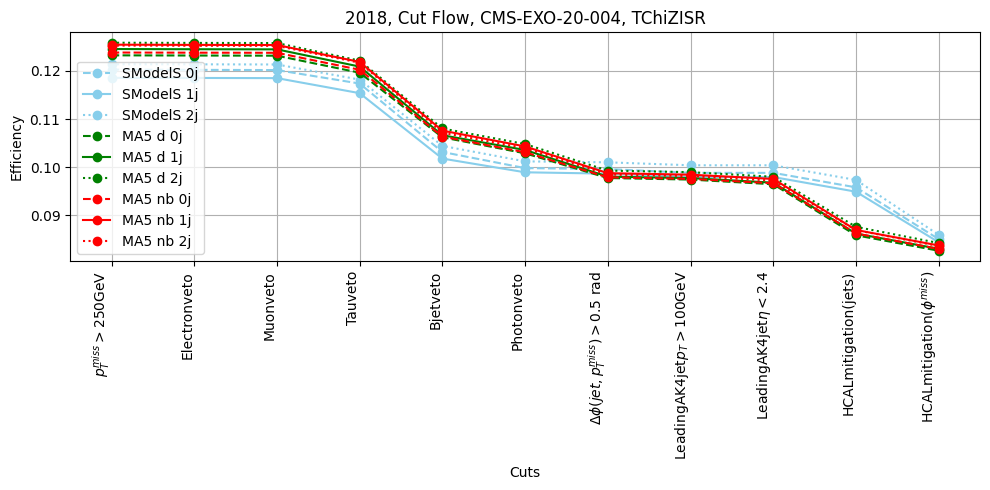

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_cut_flow_data(filename, m_med, m_dm, data_period):
    # Read the content of the file
    with open(filename, 'r') as file:
        content = file.read()

    # Split the content into blocks based on the presence of 'Cut stage'
    blocks = re.split(r'(?<=\n\n)', content.strip())

    # Initialize a result dictionary
    result = {}

    for block in blocks:
        # Check for coupling, mode, masses, and data-taking period in each block
        lines = block.strip().split('\n')
        coupling = None
        mode = None
        med_value = None
        dm_value = None
        period_value = None

        for line in lines:
            # Check for coupling, mode, and other relevant values
            if line.startswith("#: Coupling"):
                coupling = line.split(',')[1].strip()
            elif line.startswith("#: Mode"):
                mode = line.split(',')[1].strip()
            elif line.startswith("#: $m_{med}$"):
                med_value = float(line.split(',')[1].strip())
            elif line.startswith("#: $m_{DM}$"):
                dm_value = float(line.split(',')[1].strip())
            elif line.startswith("#: Data-taking period"):
                period_value = line.split(',')[1].strip()

        # Check if the current block matches the criteria
        if (med_value == m_med and dm_value == m_dm and period_value == data_period):
            # Parse the cut flow data
            for line in lines:
                if line and not line.startswith("#:") and "Cut stage" not in line:
                        print(line)
                        cut_stage, fraction = line.split(',')
                        result[cut_stage.strip()] = float(fraction.strip())

            break  # Exit after finding the first matching block

    return result


def extract_cut_info(filename, cut_indices):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    # Extract cuts and their corresponding entries
    current_cut_index = 0
    for i, line in enumerate(lines):
        if "<Counter>" in line:
            # Find the name of the cut
            cut_name = lines[i+1].split('"')[1]
            # Check if the current cut index is in the requested cut indices
            if current_cut_index in cut_indices:
                # nentries is the first number on the third line after <Counter>
                nentries = int(lines[i+2].split()[0])
                cut_dict[cut_name] = nentries
            
            current_cut_index += 1

    return initial_entries, cut_dict


MA5_0j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"
MA5_1j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"
MA5_2j_default = "mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"


MA5_0j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"
MA5_1j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"
MA5_2j_nb_card = "mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf"

cut_indices_2018 = [0,1,2,3,4,5,6,7,8,9,10]

MA5_initial_nentries_0j_d, MA5_dict_0j_d = extract_cut_info(MA5_0j_default, cut_indices_2018)
print("MA5 (0j default EM creator run card) total number of events : ", MA5_initial_nentries_0j_d)
#print(MA5_dict_0j_d)
MA5_dict_eff_0j_d = {key: value / MA5_initial_nentries_0j_d for key, value in MA5_dict_0j_d.items()}
print(MA5_dict_eff_0j_d)
keys_MA5_0j_d = list(MA5_dict_eff_0j_d.keys())
values_MA5_0j_d = list(MA5_dict_eff_0j_d.values())
print("MA5 effs (0j default EM creator run card) : ", values_MA5_0j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_d, MA5_dict_1j_d = extract_cut_info(MA5_1j_default, cut_indices_2018)
print("MA5 (1j default EM creator run card) total number of events : ", MA5_initial_nentries_1j_d)
#print(MA5_dict_1j_d)
MA5_dict_eff_1j_d = {key: value / MA5_initial_nentries_1j_d for key, value in MA5_dict_1j_d.items()}
print(MA5_dict_eff_1j_d)
keys_MA5_1j_d = list(MA5_dict_eff_1j_d.keys())
values_MA5_1j_d = list(MA5_dict_eff_1j_d.values())
print("MA5 effs (1j default EM creator run card) : ", values_MA5_1j_d)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_d, MA5_dict_2j_d = extract_cut_info(MA5_2j_default, cut_indices_2018)
print("MA5 (2j default EM creator run card) total number of events : ", MA5_initial_nentries_2j_d)
#print(MA5_dict_2j_d)
MA5_dict_eff_2j_d = {key: value / MA5_initial_nentries_2j_d for key, value in MA5_dict_2j_d.items()}
print(MA5_dict_eff_2j_d)
keys_MA5_2j_d = list(MA5_dict_eff_2j_d.keys())
values_MA5_2j_d = list(MA5_dict_eff_2j_d.values())
print("MA5 effs (2j default EM creator run card) : ", values_MA5_2j_d)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

MA5_initial_nentries_0j_nb, MA5_dict_0j_nb = extract_cut_info(MA5_0j_nb_card, cut_indices_2018)
print("MA5 (0j non-biased run card) total number of events : ", MA5_initial_nentries_0j_nb)
#print(MA5_dict_0j_nb)
MA5_dict_eff_0j_nb = {key: value / MA5_initial_nentries_0j_nb for key, value in MA5_dict_0j_nb.items()}
print(MA5_dict_eff_0j_nb)
keys_MA5_0j_nb = list(MA5_dict_eff_0j_nb.keys())
values_MA5_0j_nb = list(MA5_dict_eff_0j_nb.values())
print("MA5 effs (0j non-biased run card) : ", values_MA5_0j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_1j_nb, MA5_dict_1j_nb = extract_cut_info(MA5_1j_nb_card, cut_indices_2018)
print("MA5 (1j non-biased run card) total number of events : ", MA5_initial_nentries_1j_nb)
#print(MA5_dict_1j_nb)
MA5_dict_eff_1j_nb = {key: value / MA5_initial_nentries_1j_nb for key, value in MA5_dict_1j_nb.items()}
print(MA5_dict_eff_1j_nb)
keys_MA5_1j_nb = list(MA5_dict_eff_1j_nb.keys())
values_MA5_1j_nb = list(MA5_dict_eff_1j_nb.values())
print("MA5 effs (1j non-biased run card) : ", values_MA5_1j_nb)
print("------------------------------------------")
print("")
MA5_initial_nentries_2j_nb, MA5_dict_2j_nb = extract_cut_info(MA5_2j_nb_card, cut_indices_2018)
print("MA5 (2j non-biased run card) total number of events : ", MA5_initial_nentries_2j_nb)
#print(MA5_dict_2j_nb)
MA5_dict_eff_2j_nb = {key: value / MA5_initial_nentries_2j_nb for key, value in MA5_dict_2j_nb.items()}
print(MA5_dict_eff_2j_nb)
keys_MA5_2j_nb = list(MA5_dict_eff_2j_nb.keys())
values_MA5_2j_nb = list(MA5_dict_eff_2j_nb.values())
print("MA5 effs (2j non-biased run card) : ", values_MA5_2j_nb)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_0j = df_0j.iloc[-13:, 0].tolist()
pcl_2017_0j = df_0j.iloc[-13:, 1].tolist()
pcl_2018_0j = df_0j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_1j = df_1j.iloc[-13:, 0].tolist()
pcl_2017_1j = df_1j.iloc[-13:, 1].tolist()
pcl_2018_1j = df_1j.iloc[-13:, 2].tolist()
# Select the last 12 rows of columns 0, 1, and 2
pcl_2016_2j = df_2j.iloc[-13:, 0].tolist()
pcl_2017_2j = df_2j.iloc[-13:, 1].tolist()
pcl_2018_2j = df_2j.iloc[-13:, 2].tolist()

selected_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Select the last 12 rows of the index (the names column)
cuts_names = df_0j.index[-13:].tolist()
new_cuts_names = [cuts_names[i] for i in selected_indices]

# Indices of keys you want to include in the plot
new_pcl_16_0j = [pcl_2016_0j[i] for i in selected_indices]
new_pcl_17_0j = [pcl_2017_0j[i] for i in selected_indices]
new_pcl_18_0j = [pcl_2018_0j[i] for i in selected_indices]

# Indices of keys you want to include in the plot 
new_pcl_16_1j = [pcl_2016_1j[i] for i in selected_indices]
new_pcl_17_1j = [pcl_2017_1j[i] for i in selected_indices]
new_pcl_18_1j = [pcl_2018_1j[i] for i in selected_indices]

# Indices of keys you want to include in the plot 
new_pcl_16_2j = [pcl_2016_2j[i] for i in selected_indices]
new_pcl_17_2j = [pcl_2017_2j[i] for i in selected_indices]
new_pcl_18_2j = [pcl_2018_2j[i] for i in selected_indices]



#print(new_cuts_names)
print("SModelS reacst code 0j effs : ", new_pcl_18_0j)
print("------------------------------------------")
print("SModelS reacst code 1j effs : ", new_pcl_18_1j)
print("------------------------------------------")
print("SModelS reacst code 2j effs : ", new_pcl_18_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")



# Compute percentage difference
percentage_diff_ma5_0j = np.abs(np.array(values_MA5_0j_d) - np.array(values_MA5_0j_nb)) / ((np.array(values_MA5_0j_d) + np.array(values_MA5_0j_nb)) / 2) * 100

percentage_diff_ma5_1j = np.abs(np.array(values_MA5_1j_d) - np.array(values_MA5_1j_nb)) / ((np.array(values_MA5_1j_d) + np.array(values_MA5_1j_nb)) / 2) * 100

percentage_diff_ma5_2j = np.abs(np.array(values_MA5_2j_d) - np.array(values_MA5_2j_nb)) / ((np.array(values_MA5_2j_d) + np.array(values_MA5_2j_nb)) / 2) * 100

percentage_diff_0j = np.abs(np.array(values_MA5_0j_nb) - np.array(new_pcl_18_0j)) / ((np.array(values_MA5_0j_nb) + np.array(new_pcl_18_0j)) / 2) * 100

percentage_diff_1j = np.abs(np.array(values_MA5_1j_nb) - np.array(new_pcl_18_1j)) / ((np.array(values_MA5_1j_nb) + np.array(new_pcl_18_1j)) / 2) * 100

percentage_diff_2j = np.abs(np.array(values_MA5_2j_nb) - np.array(new_pcl_18_2j)) / ((np.array(values_MA5_2j_nb) + np.array(new_pcl_18_2j)) / 2) * 100



print("MA5 Percentage difference (0j, default vs non-biased run card) : ", percentage_diff_ma5_0j)
print("------------------------------------------")
print("MA5 Percentage difference (1j, default vs non-biased run card) : ", percentage_diff_ma5_1j)
print("------------------------------------------")
print("MA5 Percentage difference (2j, default vs non-biased run card) : ", percentage_diff_ma5_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")
print("Percentage difference (0j, MA5 default vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("Percentage difference (1j, MA5 default vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("Percentage difference (2j, MA5 default vs SModelS recast) : ", percentage_diff_2j)


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(new_cuts_names, new_pcl_18_0j, color='skyblue', marker='o', linestyle='--', 
         label = 'SModelS 0j')
plt.plot(new_cuts_names, new_pcl_18_1j, color='skyblue', marker='o', linestyle='-', 
         label = 'SModelS 1j')
plt.plot(new_cuts_names, new_pcl_18_2j, color='skyblue', marker='o', linestyle=':', 
         label = 'SModelS 2j')
plt.plot(new_cuts_names, values_MA5_0j_d, color='g', marker='o', linestyle='--',
         label = 'MA5 d 0j')
plt.plot(new_cuts_names, values_MA5_1j_d, color='g', marker='o', linestyle='-',
         label = 'MA5 d 1j')
plt.plot(new_cuts_names, values_MA5_2j_d, color='g', marker='o', linestyle=':',
         label = 'MA5 d 2j')
plt.plot(new_cuts_names, values_MA5_0j_nb, color='r', marker='o', linestyle='--',
         label = 'MA5 nb 0j')
plt.plot(new_cuts_names, values_MA5_1j_nb, color='r', marker='o', linestyle='-',
         label = 'MA5 nb 1j')
plt.plot(new_cuts_names, values_MA5_2j_nb, color='r', marker='o', linestyle=':',
         label = 'MA5 nb 2j')

plt.xlabel('Cuts')
plt.ylabel('Efficiency')
plt.title('2018, Cut Flow, CMS-EXO-20-004, TChiZISR')
plt.xticks(rotation=90, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### TODO: Plot pT distributions

199923
199894
pt_miss :  [[553], [427], [38.1], [92.4], [367], ..., [444], [154], [138], [54.5], [37]]
pt_miss MA5 :  [[480], [46.4], [69.4], [379], [8.61], ..., [137], [8.75], [30.4], [63.4]]
DM_pt_miss :  [[0], [0], [0], [0], [0], [0], [0], [0], ..., [0], [0], [0], [0], [0], [0], [0]]
DM_pt_miss MA5 :  [[0], [0], [0], [0], [0], [0], [0], [0], ..., [0], [0], [0], [0], [0], [0], [0]]
Weights array : [[9.75e-11, 4.88e-16], [9.75e-11, 4.88e-16], ..., [...], [9.75e-11, 4.88e-16]]
Weights array MA5 : [[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]
jet_pt array: [[357, 207, 26.8], [356, 85.5], [24.3], [97.5], ..., [...], [131], [49.2], [30]]
jet_pt array MA5 : [[554, 160, 23.3], [47.6], [52, 30.8], [336, ...], ..., [], [], [97.7, 22.4]]
jet_BTag array: [[1, 0, 0], [0, 1], [0], [0], [1, 0], ..., [0, ..., 0], [0, 0], [0], [0], [0]]
jet_BTag array MA5 : [[0, 0, 0], [0], [0, 0], [0, 0], [], [], [], ..., [], [0], [0], [], [], [0, 0]]


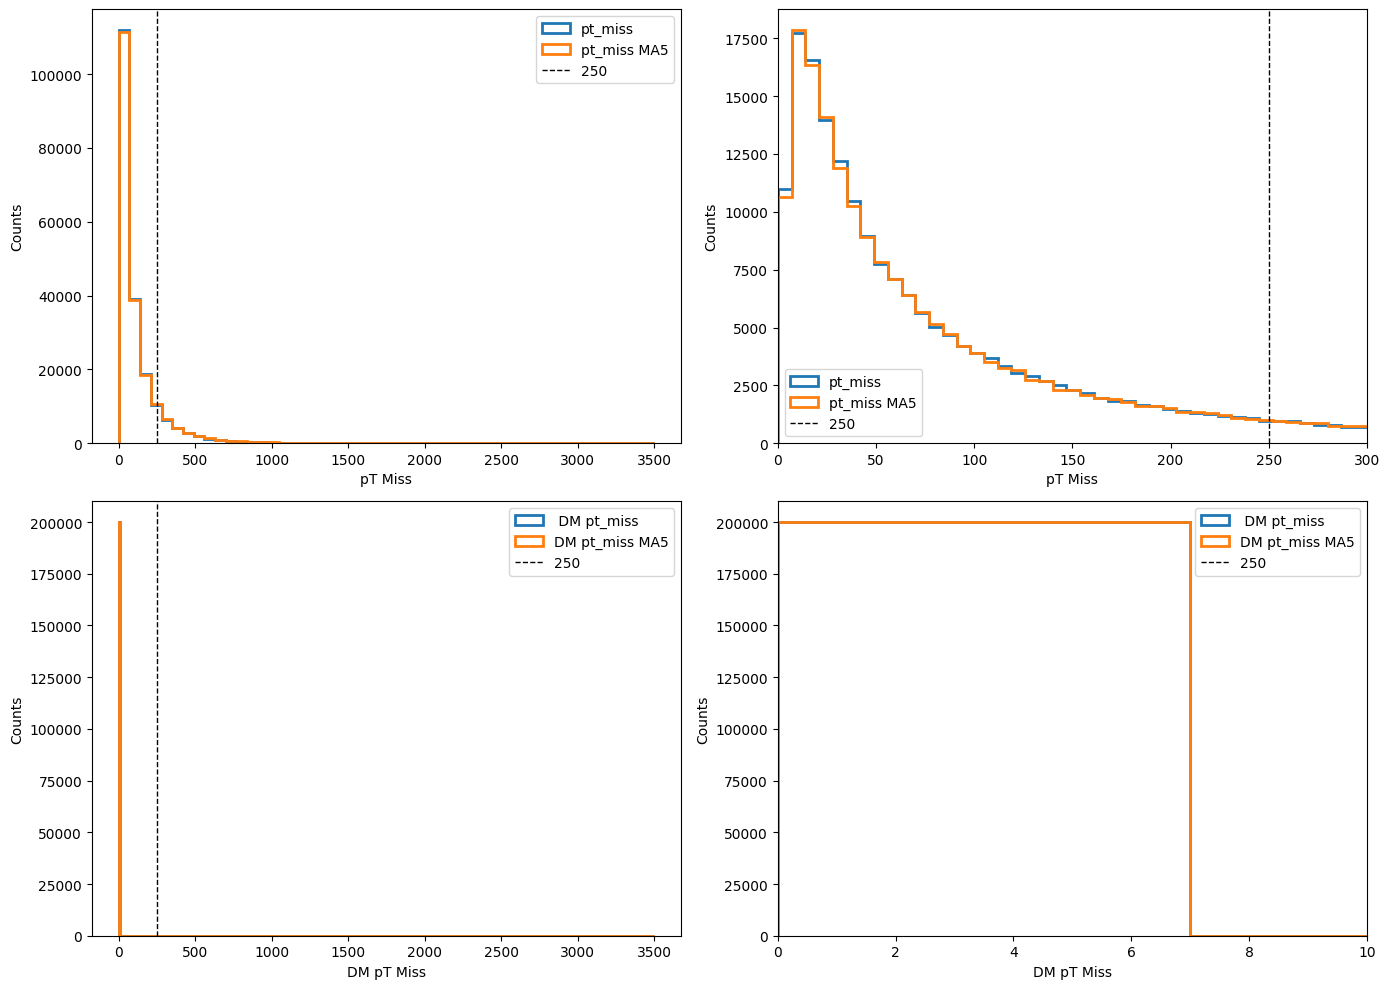

In [12]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak  # Awkward array for handling jagged arrays

# Load the .root file
file = uproot.open("SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_delphes_events.root")

file_MA5=uproot.open("mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/RecoEvents/\
RecoEvents_v1x2_delphes_card_cms_exo_20_004.root")

tree = file["Delphes"]
tree_MA5 = file_MA5["Delphes"]

nvents = tree["Event_size"].array()
print(len(nvents))
nvents_MA5 = tree_MA5["Event_size"].array()
print(len(nvents_MA5))

pt_miss = tree["MissingET.MET"].array()
print("pt_miss : ", pt_miss)
pt_miss_MA5 = tree_MA5["MissingET.MET"].array()
print("pt_miss MA5 : ", pt_miss_MA5)

DM_pt_miss = tree["DMMissingET.MET"].array()
print("DM_pt_miss : ", DM_pt_miss)
DM_pt_miss_MA5 = tree_MA5["DMMissingET.MET"].array()
print("DM_pt_miss MA5 : ", DM_pt_miss_MA5)

weights = tree["Weight.Weight"].array()
print("Weights array :", weights)
weights_MA5 = tree_MA5["Weight.Weight"].array()
print("Weights array MA5 :", weights_MA5)

jet_pt = tree["Jet.PT"].array()
print("jet_pt array:", jet_pt)
jet_pt_MA5 = tree_MA5["Jet.PT"].array()
print("jet_pt array MA5 :", jet_pt_MA5)

jet_BTag = tree["Jet.BTag"].array()
print("jet_BTag array:", jet_BTag)
jet_BTag_MA5 = tree_MA5["Jet.BTag"].array()
print("jet_BTag array MA5 :", jet_BTag_MA5)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot
axes[0][0].hist(pt_miss, bins=50, range=(0, 3500), histtype='step', linewidth=2, label='pt_miss')
axes[0][0].hist(pt_miss_MA5, bins=50, range=(0, 3500), histtype='step', linewidth=2, label='pt_miss MA5')
axes[0][0].axvline(x=250, color='k', linestyle='--', linewidth=1, label=r'250')
axes[0][0].set_xlabel('pT Miss')
axes[0][0].set_ylabel('Counts')
axes[0][0].legend()

# First subplot
axes[0][1].hist(pt_miss, bins=500, range=(0, 3500), histtype='step', linewidth=2, label='pt_miss')
axes[0][1].hist(pt_miss_MA5, bins=500, range=(0, 3500), histtype='step', linewidth=2, label='pt_miss MA5')
axes[0][1].axvline(x=250, color='k', linestyle='--', linewidth=1, label=r'250')
axes[0][1].set_xlabel('pT Miss')
axes[0][1].set_ylabel('Counts')
#axes[0][1].set_ylim(0,500)
axes[0][1].set_xlim(0,300)
axes[0][1].legend()

# Second subplot
axes[1][0].hist(DM_pt_miss, bins=500, range=(0, 3500), histtype='step', linewidth=2, label=' DM pt_miss')
axes[1][0].hist(DM_pt_miss_MA5, bins=500, range=(0, 3500), histtype='step', linewidth=2, label='DM pt_miss MA5')
axes[1][0].axvline(x=250, color='k', linestyle='--', linewidth=1, label=r'250')
axes[1][0].set_xlabel('DM pT Miss')
axes[1][0].set_ylabel('Counts')
axes[1][0].legend()

# Second subplot
axes[1][1].hist(DM_pt_miss, bins=500, range=(0, 3500), histtype='step', linewidth=2, label=' DM pt_miss')
axes[1][1].hist(DM_pt_miss_MA5, bins=500, range=(0, 3500), histtype='step', linewidth=2, label='DM pt_miss MA5')
axes[1][1].axvline(x=250, color='k', linestyle='--', linewidth=1, label=r'250')
axes[1][1].set_xlabel('DM pT Miss')
axes[1][1].set_ylabel('Counts')
axes[1][1].set_xlim(0,10)
#axes[1][1].set_ylim(0,500)
axes[1][1].legend()

plt.tight_layout()
plt.show()
